# what is TF :- Number of occurence of a word in a document is divided by                          number of words in that documents
# tfidfvectorizer:-term frequency inverse documnets frequency

In [1]:
# import all the Module. 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline


In [2]:
# Read the Csv with the help of Pandas library
df = pd.read_csv("news.csv")

In [3]:
#Cleaning the data and display top 5 Data.
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [4]:
df.size

25340

In [5]:
df.shape

(6335, 4)

In [6]:
df['title'].head()

0                         You Can Smell Hillary’s Fear
1    Watch The Exact Moment Paul Ryan Committed Pol...
2          Kerry to go to Paris in gesture of sympathy
3    Bernie supporters on Twitter erupt in anger ag...
4     The Battle of New York: Why This Primary Matters
Name: title, dtype: object

In [7]:
df['text'].head()

0    Daniel Greenfield, a Shillman Journalism Fello...
1    Google Pinterest Digg Linkedin Reddit Stumbleu...
2    U.S. Secretary of State John F. Kerry said Mon...
3    — Kaydee King (@KaydeeKing) November 9, 2016 T...
4    It's primary day in New York and front-runners...
Name: text, dtype: object

In [8]:
df.ndim

2

In [9]:
df.index

RangeIndex(start=0, stop=6335, step=1)

In [10]:
df.std

<bound method DataFrame.std of       Unnamed: 0                                              title  \
0           8476                       You Can Smell Hillary’s Fear   
1          10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2           3608        Kerry to go to Paris in gesture of sympathy   
3          10142  Bernie supporters on Twitter erupt in anger ag...   
4            875   The Battle of New York: Why This Primary Matters   
5           6903                                        Tehran, USA   
6           7341  Girl Horrified At What She Watches Boyfriend D...   
7             95                  ‘Britain’s Schindler’ Dies at 106   
8           4869  Fact check: Trump and Clinton at the 'commande...   
9           2909  Iran reportedly makes new push for uranium con...   
10          1357  With all three Clintons in Iowa, a glimpse at ...   
11           988  Donald Trump’s Shockingly Weak Delegate Game S...   
12          7041  Strong Solar Storm, Tech Ris

In [11]:
col = list(df.columns)


In [12]:
print(col)

['Unnamed: 0', 'title', 'text', 'label']


In [13]:
df['Unnamed: 0'].head()

0     8476
1    10294
2     3608
3    10142
4      875
Name: Unnamed: 0, dtype: int64

In [14]:
df["title"].head()

0                         You Can Smell Hillary’s Fear
1    Watch The Exact Moment Paul Ryan Committed Pol...
2          Kerry to go to Paris in gesture of sympathy
3    Bernie supporters on Twitter erupt in anger ag...
4     The Battle of New York: Why This Primary Matters
Name: title, dtype: object

In [15]:
df.rename({'Unnamed: 0':"Name"},inplace=True,axis = 1)

In [16]:
df.columns

Index(['Name', 'title', 'text', 'label'], dtype='object')

In [17]:
df.head()

,Name,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [18]:
df.rename({"title":"Title","text":"Text","label":"Label"},inplace = True,axis=1)

In [19]:
df.head()

,Name,Title,Text,Label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [20]:
df.rename({"Name":"Number"},inplace=True,axis=1)

In [21]:
df.head()

,Number,Title,Text,Label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [22]:
df.columns

Index(['Number', 'Title', 'Text', 'Label'], dtype='object')

In [23]:
import sklearn as sk
import numpy as np
import pandas as pd
import itertools


In [24]:
from sklearn.model_selection import train_test_split

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [30]:
#GEt the labels from the dataframe
df['Label'].head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: Label, dtype: object

In [32]:
#Split the datasets into training and testing sets
x_train,x_test,y_train,y_test = train_test_split(df['Text'],df['Label'],test_size=0.2,random_state=7)

In [34]:
x_train.head()

6237    The head of a leading survivalist group has ma...
3722    ‹ › Arnaldo Rodgers is a trained and educated ...
5774    Patty Sanchez, 51, used to eat 13,000 calories...
336     But Benjamin Netanyahu’s reelection was regard...
3622    John Kasich was killing it with these Iowa vot...
Name: Text, dtype: object

In [35]:
x_test.head()

3534    A day after the candidates squared off in a fi...
6265    VIDEO : FBI SOURCES SAY INDICTMENT LIKELY FOR ...
3123    It's debate season, where social media has bro...
3940    Mitch McConnell has decided to wager the Repub...
2856    Donald Trump, the actual Republican candidate ...
Name: Text, dtype: object

In [41]:
y_test.head()

3534    REAL
6265    FAKE
3123    REAL
3940    REAL
2856    REAL
Name: Label, dtype: object

In [42]:
y_train.head()

6237    FAKE
3722    FAKE
5774    FAKE
336     REAL
3622    REAL
Name: Label, dtype: object

In [43]:
#Lets initialize the TFIDFVECTORIZER because its used for stopping word from the English 
#language and a maximum documnets frequency of 0.7.Stop words are the most common word
# in a language that are to filtered out before processing the natural
# lnguage data . And  tfidfvectorizer turns a collection of raw
# documents

In [44]:
#Tfidfvectorizer intilize 
tfidf_vector = TfidfVectorizer(stop_words="english",max_df=0.7)



In [64]:
# Fit and transform train set,transform test set
tfidf_train = tfidf_vector.fit_transform(x_train)
tfidf_test =  tfidf_vector.transform(x_test)

In [65]:
tfidf_train

<5068x61651 sparse matrix of type '<class 'numpy.float64'>'
	with 1337098 stored elements in Compressed Sparse Row format>

In [66]:
tfidf_test

<1267x61651 sparse matrix of type '<class 'numpy.float64'>'
	with 322056 stored elements in Compressed Sparse Row format>

In [67]:
# Intiliaze the PassiveAggressive classifier

In [68]:
pac = PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
              early_stopping=False, fit_intercept=True, loss='hinge',
              max_iter=50, n_iter=None, n_iter_no_change=5, n_jobs=None,
              random_state=None, shuffle=True, tol=None,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [69]:
y_pred = pac.predict(tfidf_test)


In [71]:
y_pred

array(['REAL', 'FAKE', 'REAL', ..., 'REAL', 'FAKE', 'REAL'], dtype='<U4')

In [81]:
score=accuracy_score(y_test,y_pred)
Accuracy = f'Accuracy: {round(score*100,2)}%'

In [82]:
accuracy

'Accuracy: 92.66%'

In [83]:
# Build confusion matrix for predict the numbe rof True or false
#and negative and positive

In [86]:
confusion_matrix(y_test,y_pred,labels=['FAKE','REAL'])


array([[587,  51],
       [ 42, 587]], dtype=int64)

In [95]:
df.shape

(6335, 4)

In [96]:
df.size

25340

In [97]:
df.mean

<bound method DataFrame.mean of       Number                                              Title  \
0       8476                       You Can Smell Hillary’s Fear   
1      10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2       3608        Kerry to go to Paris in gesture of sympathy   
3      10142  Bernie supporters on Twitter erupt in anger ag...   
4        875   The Battle of New York: Why This Primary Matters   
5       6903                                        Tehran, USA   
6       7341  Girl Horrified At What She Watches Boyfriend D...   
7         95                  ‘Britain’s Schindler’ Dies at 106   
8       4869  Fact check: Trump and Clinton at the 'commande...   
9       2909  Iran reportedly makes new push for uranium con...   
10      1357  With all three Clintons in Iowa, a glimpse at ...   
11       988  Donald Trump’s Shockingly Weak Delegate Game S...   
12      7041  Strong Solar Storm, Tech Risks Today | S0 News...   
13      7623       10 Ways Ame

In [98]:
df['Number'].mean()

5280.4156274664565

In [100]:
df['Number'].head()

0     8476
1    10294
2     3608
3    10142
4      875
Name: Number, dtype: int64

In [105]:
df['Text'].head()

0    Daniel Greenfield, a Shillman Journalism Fello...
1    Google Pinterest Digg Linkedin Reddit Stumbleu...
2    U.S. Secretary of State John F. Kerry said Mon...
3    — Kaydee King (@KaydeeKing) November 9, 2016 T...
4    It's primary day in New York and front-runners...
Name: Text, dtype: object

In [106]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

accuracy:   0.927
Confusion matrix, without normalization


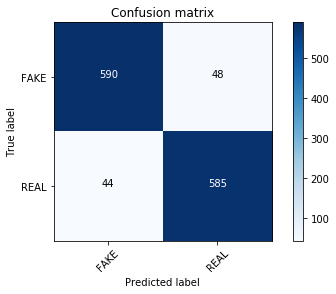

In [114]:
pac.fit(tfidf_train, y_train)
pred = pac.predict(tfidf_test)
score = accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


accuracy:   0.925
Confusion matrix, without normalization


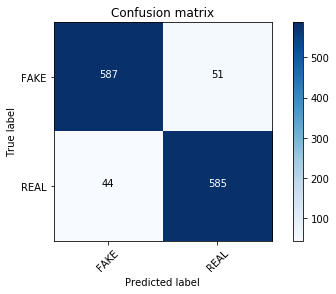

In [117]:
pac.fit(tfidf_train, y_train)
pred = pac.predict(tfidf_test)
score = accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = confusion_matrix(y_test, pred, labels=['FAKE', 'REAL'])
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])